In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [39]:
beer = pd.read_csv("beer.txt", sep = ' ')

In [40]:
print(beer)

                    name  calories  sodium  alcohol  cost
0              Budweiser       144      15      4.7  0.43
1                Schlitz       151      19      4.9  0.43
2              Lowenbrau       157      15      0.9  0.48
3            Kronenbourg       170       7      5.2  0.73
4               Heineken       152      11      5.0  0.77
5          Old_Milwaukee       145      23      4.6  0.28
6             Augsberger       175      24      5.5  0.40
7   Srohs_Bohemian_Style       149      27      4.7  0.42
8            Miller_Lite        99      10      4.3  0.43
9        Budweiser_Light       113       8      3.7  0.40
10                 Coors       140      18      4.6  0.44
11           Coors_Light       102      15      4.1  0.46
12        Michelob_Light       135      11      4.2  0.50
13                 Becks       150      19      4.7  0.76
14                 Kirin       149       6      5.0  0.79
15     Pabst_Extra_Light        68      15      2.3  0.38
16            

In [41]:
X=beer.drop('name',axis=1)

In [42]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4,random_state = 1)
km.fit(X)

KMeans(n_clusters=4, random_state=1)

In [43]:
beer['cluster'] = km.labels_
beer.sort_values(by = 'cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
16,Hamms,139,19,4.4,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
14,Kirin,149,6,5.0,0.79,0
13,Becks,150,19,4.7,0.76,0


In [44]:
centers = beer.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,146.25,17.25,4.383333,0.513333
1,102.75,10.00,4.075000,0.440000
2,172.50,15.50,5.350000,0.565000
3,70.00,10.50,2.600000,0.420000


In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [46]:
colors = np.array(['red','green','blue','yellow','purple'])

Text(0, 0.5, 'alcohol')

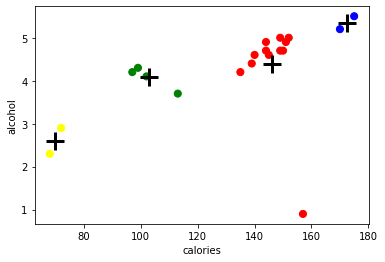

In [47]:
plt.scatter(beer.calories, beer.alcohol, c = colors[beer.cluster], s = 50 )
plt.scatter(centers.calories, centers.alcohol, linewidths = 3, marker = '+' , s = 300, c = 'black')
plt.xlabel('calories')
plt.ylabel('alcohol')

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn import metrics
k_range = range(2,20)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 1)
    km.fit(X_scaled)#
    scores.append(metrics.silhouette_score(X_scaled,km.labels_))#

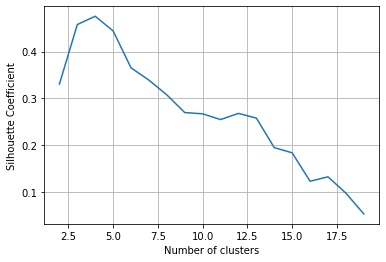

In [49]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [50]:
print(scores)

[0.33071506469818307, 0.4577741591090948, 0.47546412252215975, 0.44406582701642483, 0.3653901114020658, 0.33907631703717867, 0.3076288923656595, 0.2698982621694763, 0.2672048005497285, 0.254958988241192, 0.26813422717352503, 0.25806244985608096, 0.19510367184524086, 0.18397769400607458, 0.12332923155351702, 0.1327251791924054, 0.09795391063666273, 0.05357234845855595]


In [21]:
#AgglomerativeClustering
cl = AgglomerativeClustering(n_clusters=4,distance_threshold=None)                   
clustering = cl.fit(X)

In [22]:
clustering

AgglomerativeClustering(n_clusters=4)

In [23]:
clustering.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 2, 3],
      dtype=int64)

In [24]:
beer['cluster'] = clustering.labels_
beer.sort_values(by = 'cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
10,Coors,140,18,4.6,0.44,0
16,Hamms,139,19,4.4,0.43,0
12,Michelob_Light,135,11,4.2,0.50,0


In [25]:
centers = beer.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,146.25,17.25,4.383333,0.513333
1,172.50,15.50,5.350000,0.565000
2,70.00,10.50,2.600000,0.420000
3,102.75,10.00,4.075000,0.440000


Text(0, 0.5, 'alcohol')

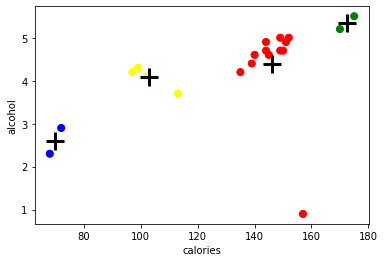

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
colors = np.array(['red','green','blue','yellow','purple'])
plt.scatter(beer.calories, beer.alcohol, c = colors[beer.cluster], s = 50 )
plt.scatter(centers.calories, centers.alcohol, linewidths = 3, marker = '+' , s = 300, c = 'black')
plt.xlabel('calories')
plt.ylabel('alcohol')

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn import metrics
k_range = range(2,20)
scores = []
for k in k_range:
    cl = AgglomerativeClustering(n_clusters=k,distance_threshold=None)
    cl.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled,cl.labels_))

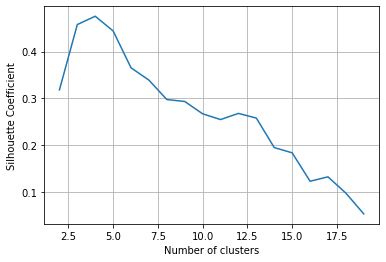

In [32]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [34]:
km.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 2, 3],
      dtype=int64)

In [35]:
clustering.labels_

array([0, 0, 0, 1, 0, 0, 1, 0, 3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 2, 3],
      dtype=int64)

In [36]:
print(scores)

[0.31823936817062226, 0.4577741591090948, 0.47546412252215975, 0.44406582701642483, 0.3653901114020658, 0.33907631703717867, 0.2976653920348913, 0.2935513325548086, 0.2672048005497285, 0.254958988241192, 0.26813422717352503, 0.25806244985608096, 0.19510367184524086, 0.18397769400607458, 0.12332923155351702, 0.1327251791924054, 0.09795391063666273, 0.05357234845855595]
